# **Assignment 10**

In [58]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library

In [59]:
from sklearn import datasets as ds

# Load iris dataset 
iris = ds.load_iris()

# Assign X (feature or input) and Y (target or output) vaiables 
X=iris.data
Y=iris.target


**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [60]:
import pandas as pd

# Create a dataframe that contains feature names as column headings 
df=pd.DataFrame(X[:5],columns=iris.feature_names)

# View the data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [61]:
# Create a separate pyhton list containing target names
target_name=iris.target_names.tolist()
print(target_name)

['setosa', 'versicolor', 'virginica']


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [62]:
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np

# Create kNN classifier model with neighbors=5
knn = KNN(n_neighbors=5)

# Fit model on the dataset
knn.fit(X,Y)

# Define new observations
new_observations = np.array([[5.2,6.7,1.7,0.5],[1,3,5,6],[2.1,0.4,0.3,1.2]])

# Predict new observations category
prediction_category = knn.predict(new_observations)

# Map the prediction categories (or labels) to their corresponding target names
predicted_name= iris.target_names[prediction_category]

# View predicted target names
print(predicted_name)

['setosa' 'virginica' 'setosa']


**Q3** 15 pts

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [63]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Split iris dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = tts(X,Y, test_size=0.20)

# Standardized feature data: 
# Define preprocessing class
scaler=StandardScaler() 

# Estimate scaler parameter i.e. mean and standard deviation from the training data
scaler.fit(X_train) 

# Transform both training and test data to apply scaling.
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Fit training data into the algorithm considering n_neighbors=5
kn=KNN(n_neighbors=5)
kn.fit(X_train,y_train)

# Use test data for prediction
y_pred=kn.predict(X_test)

# Generate and return accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9666666666666667


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

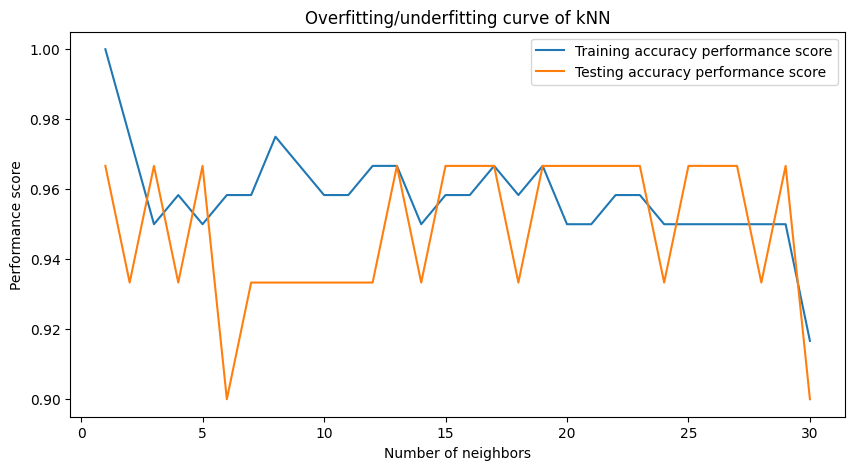

In [64]:
import matplotlib.pyplot as plt

# Define neighbor values range
neighbor_values = range(1, 31)

# Define empty lists for training and testing accuracy score
train_scores = []
test_scores = []

# Create a for loop to calculate training and testing accuracy scores for a range of neighbor values and store the accuracy scores to train and test score lists
for k in neighbor_values:
    knnn = KNN(n_neighbors=k)
    knnn.fit(X_train, y_train)
    train_score_prediction = knnn.predict(X_train)
    test_score_prediction= knnn.predict(X_test)
    train_scores.append(accuracy_score(y_train, train_score_prediction))
    test_scores.append(accuracy_score(y_test, test_score_prediction))

# Plot curves
plt.figure(figsize=(10, 5))
plt.plot(neighbor_values, train_scores, label='Training accuracy performance score')
plt.plot(neighbor_values, test_scores, label='Testing accuracy performance score')
plt.xlabel('Number of neighbors')
plt.ylabel('Performance score')
plt.title('Overfitting/underfitting curve of kNN')
plt.legend()
plt.show()
